In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for API key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

626

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | uppsala
Processing Record 2 of Set 1 | avarua
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | thompson
Processing Record 5 of Set 1 | kavieng
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | east london
Processing Record 8 of Set 1 | buqayq
City not found. Skipping...
Processing Record 9 of Set 1 | nikolskoye
Processing Record 10 of Set 1 | georgetown
Processing Record 11 of Set 1 | hilo
Processing Record 12 of Set 1 | wuwei
Processing Record 13 of Set 1 | hithadhoo
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | biloela
Processing Record 16 of Set 1 | miri
Processing Record 17 of Set 1 | dubrovka
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | weiser
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | dongsheng
Processing Record 22 of Set 1 | tilichiki
Processing Record 23 of 

Processing Record 38 of Set 4 | newport
Processing Record 39 of Set 4 | hami
Processing Record 40 of Set 4 | tuktoyaktuk
Processing Record 41 of Set 4 | voh
Processing Record 42 of Set 4 | lephepe
City not found. Skipping...
Processing Record 43 of Set 4 | bangkalan
Processing Record 44 of Set 4 | mount darwin
Processing Record 45 of Set 4 | fairbanks
Processing Record 46 of Set 4 | laguna
Processing Record 47 of Set 4 | nome
Processing Record 48 of Set 4 | la plata
Processing Record 49 of Set 4 | malanje
Processing Record 50 of Set 4 | faya
Processing Record 1 of Set 5 | saint-joseph
Processing Record 2 of Set 5 | bandundu
Processing Record 3 of Set 5 | kodiak
Processing Record 4 of Set 5 | hambantota
Processing Record 5 of Set 5 | santa lucia
Processing Record 6 of Set 5 | vila franca do campo
Processing Record 7 of Set 5 | lorengau
Processing Record 8 of Set 5 | nioro
Processing Record 9 of Set 5 | palafrugell
Processing Record 10 of Set 5 | pisco
Processing Record 11 of Set 5 | kav

Processing Record 29 of Set 8 | svetlaya
Processing Record 30 of Set 8 | samarai
Processing Record 31 of Set 8 | meadow lake
Processing Record 32 of Set 8 | husavik
Processing Record 33 of Set 8 | port lincoln
Processing Record 34 of Set 8 | riyadh
Processing Record 35 of Set 8 | san luis
Processing Record 36 of Set 8 | barceloneta
Processing Record 37 of Set 8 | kutum
Processing Record 38 of Set 8 | zhigansk
Processing Record 39 of Set 8 | acajutla
Processing Record 40 of Set 8 | ibotirama
Processing Record 41 of Set 8 | sorvag
City not found. Skipping...
Processing Record 42 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 43 of Set 8 | bilma
Processing Record 44 of Set 8 | bossembele
City not found. Skipping...
Processing Record 45 of Set 8 | hare bay
Processing Record 46 of Set 8 | bira
Processing Record 47 of Set 8 | sumenep
Processing Record 48 of Set 8 | hegang
Processing Record 49 of Set 8 | nehe
Processing Record 50 of Set 8 | lasa
Processing Rec

Processing Record 16 of Set 12 | ganzhou
Processing Record 17 of Set 12 | wick
Processing Record 18 of Set 12 | murray bridge
Processing Record 19 of Set 12 | jiddah
City not found. Skipping...
Processing Record 20 of Set 12 | sirajganj
Processing Record 21 of Set 12 | simplicio mendes
Processing Record 22 of Set 12 | awbari
Processing Record 23 of Set 12 | latung
Processing Record 24 of Set 12 | tandur
Processing Record 25 of Set 12 | havelock
Processing Record 26 of Set 12 | vanimo
Processing Record 27 of Set 12 | jakhal mandi
City not found. Skipping...
Processing Record 28 of Set 12 | mankono
Processing Record 29 of Set 12 | prabumulih
Processing Record 30 of Set 12 | naushki
Processing Record 31 of Set 12 | rocha
Processing Record 32 of Set 12 | havre-saint-pierre
Processing Record 33 of Set 12 | kota bahru
Processing Record 34 of Set 12 | fare
Processing Record 35 of Set 12 | palabuhanratu
City not found. Skipping...
Processing Record 36 of Set 12 | safwah
City not found. Skippin

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Uppsala,60.0000,17.7500,45.00,100,90,5.75,SE,2021-05-18 04:03:42
1,Avarua,-21.2078,-159.7750,75.20,94,75,11.50,CK,2021-05-18 04:03:43
2,Cape Town,-33.9258,18.4232,52.00,93,0,3.44,ZA,2021-05-18 04:03:43
3,Thompson,55.7435,-97.8558,37.40,65,90,8.05,CA,2021-05-18 04:03:44
4,Kavieng,-2.5744,150.7967,84.78,72,32,11.65,PG,2021-05-18 04:03:44
5,Punta Arenas,-53.1500,-70.9167,44.60,93,0,5.75,CL,2021-05-18 04:03:04
6,East London,-33.0153,27.9116,53.60,66,0,8.05,ZA,2021-05-18 04:03:44
7,Nikolskoye,59.7035,30.7861,61.00,94,40,4.47,RU,2021-05-18 04:03:45
8,Georgetown,5.4112,100.3354,87.01,74,20,2.30,MY,2021-05-18 04:01:38
9,Hilo,19.7297,-155.0900,78.80,57,75,6.91,US,2021-05-18 04:03:30


In [8]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Uppsala,SE,2021-05-18 04:03:42,60.0000,17.7500,45.00,100,90,5.75
1,Avarua,CK,2021-05-18 04:03:43,-21.2078,-159.7750,75.20,94,75,11.50
2,Cape Town,ZA,2021-05-18 04:03:43,-33.9258,18.4232,52.00,93,0,3.44
3,Thompson,CA,2021-05-18 04:03:44,55.7435,-97.8558,37.40,65,90,8.05
4,Kavieng,PG,2021-05-18 04:03:44,-2.5744,150.7967,84.78,72,32,11.65
5,Punta Arenas,CL,2021-05-18 04:03:04,-53.1500,-70.9167,44.60,93,0,5.75
6,East London,ZA,2021-05-18 04:03:44,-33.0153,27.9116,53.60,66,0,8.05
7,Nikolskoye,RU,2021-05-18 04:03:45,59.7035,30.7861,61.00,94,40,4.47
8,Georgetown,MY,2021-05-18 04:01:38,5.4112,100.3354,87.01,74,20,2.30
9,Hilo,US,2021-05-18 04:03:30,19.7297,-155.0900,78.80,57,75,6.91


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

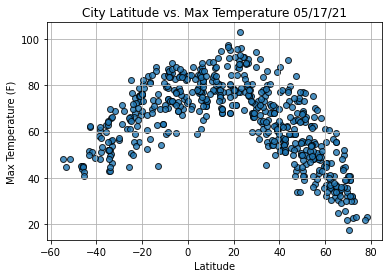

In [11]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

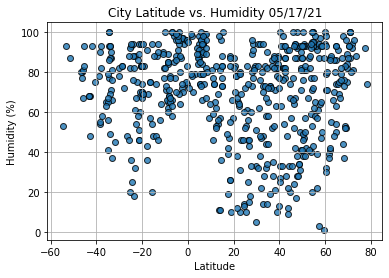

In [12]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

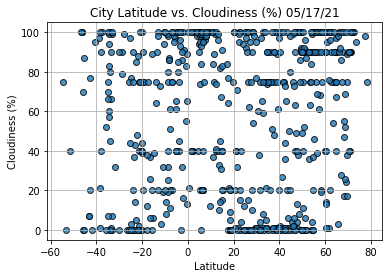

In [13]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

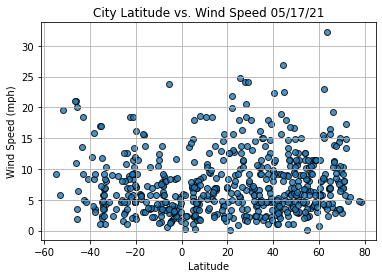

In [14]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [15]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [16]:
index13 = city_data_df.loc[13]
index13

City                      Biloela
Country                        AU
Date          2021-05-18 04:03:47
Lat                      -24.4167
Lng                         150.5
Max Temp                     76.5
Humidity                       25
Cloudiness                      0
Wind Speed                  10.76
Name: 13, dtype: object

In [17]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

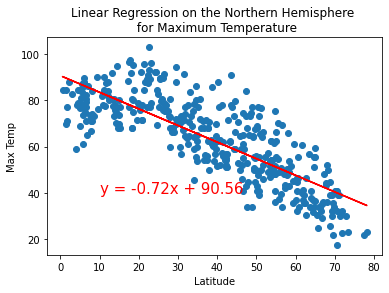

In [18]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature',
                       'Max Temp',(10,40))

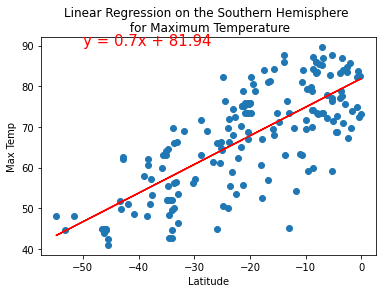

In [19]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 
                       'Max Temp',(-50,90))

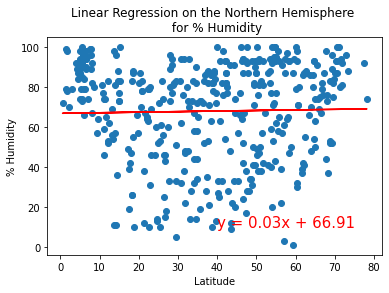

In [20]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', 
                       '% Humidity',(40,10))

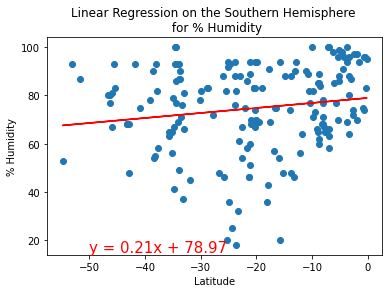

In [21]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', 
                       '% Humidity',(-50,15))

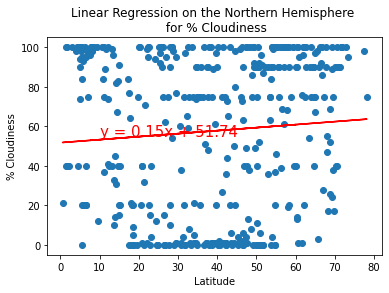

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness',(10,55))

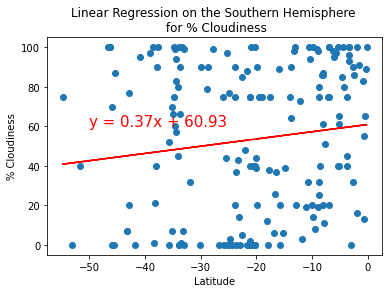

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

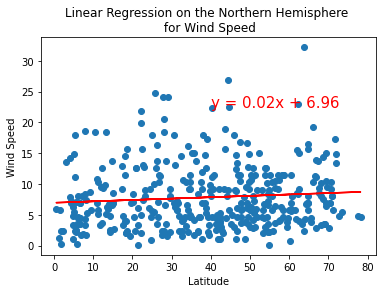

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,22.5))

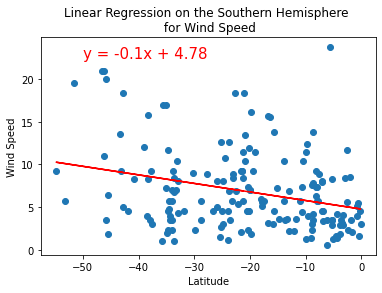

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,22.5))